In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('data/alta-noaa-1980-2019.csv')

In [3]:
dates=pd.to_datetime(df.DATE)

In [4]:
snow=df.SNOW.rename(dates)

In [5]:
snow.head()

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
Name: SNOW, dtype: float64

# Histogram

<AxesSubplot:ylabel='Frequency'>

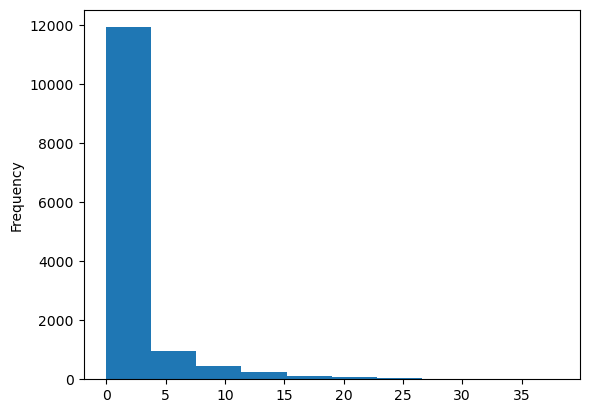

In [6]:
snow.plot.hist()

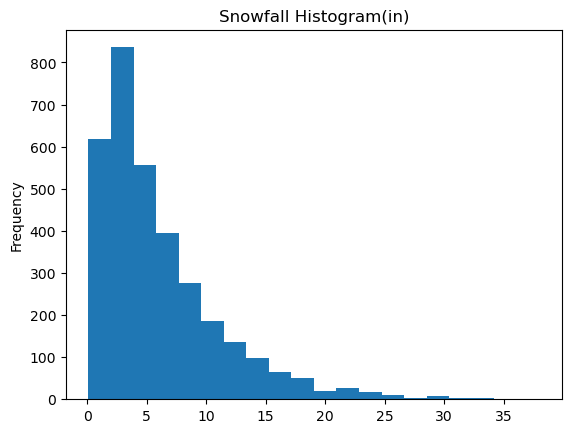

In [7]:
snow[snow>0].plot.hist(bins=20,title='Snowfall Histogram(in)');

# Box plot

<AxesSubplot:>

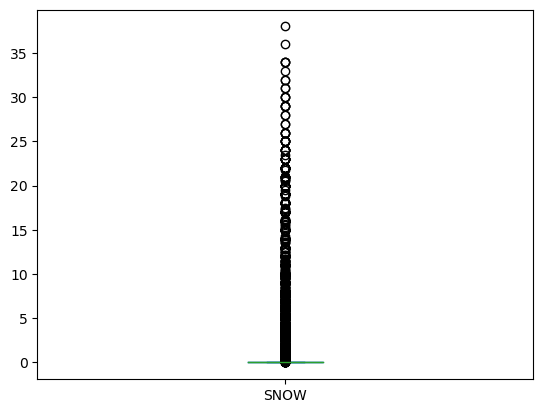

In [8]:
snow.plot.box()

<AxesSubplot:>

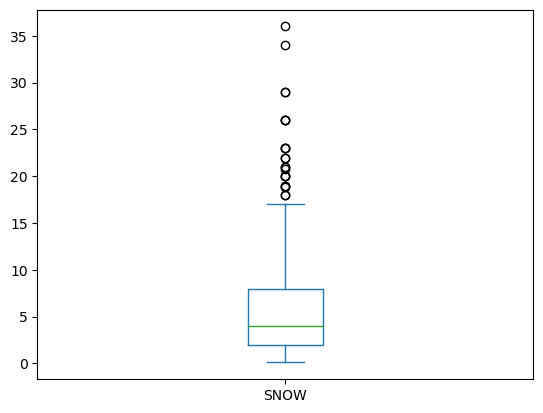

In [9]:
# snow amounts during january (ignoring zero)
snow[lambda s:(s.index.month==1) & (s>0)].plot.box()

# Kernel Density Estimation Plot

<AxesSubplot:ylabel='Density'>

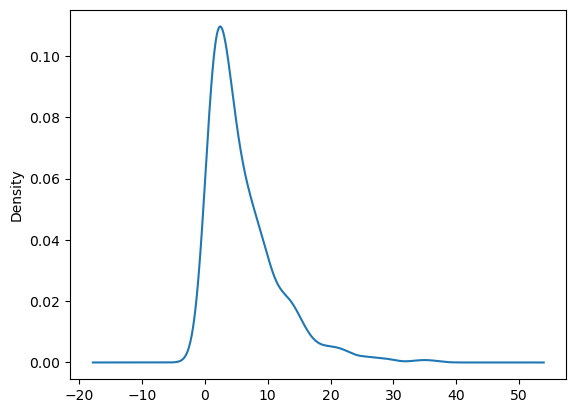

In [10]:
snow[lambda s:(s.index.month==1) & (s>0)].plot.kde()

# Line plot

<AxesSubplot:>

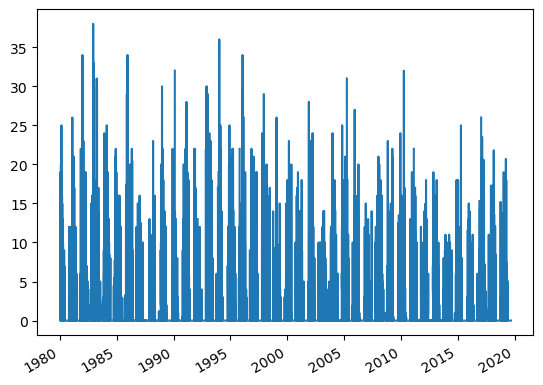

In [11]:
snow.plot.line()

<AxesSubplot:>

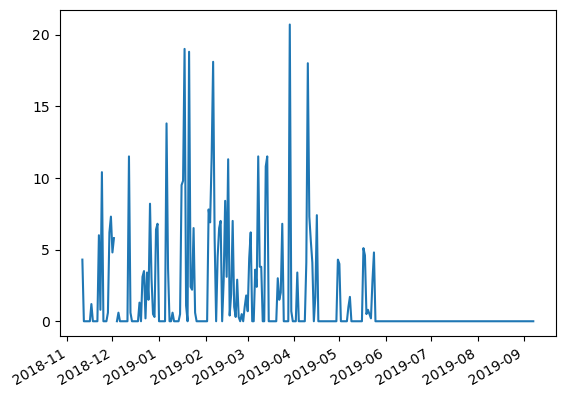

In [12]:
snow.iloc[-300:].plot.line()

<AxesSubplot:>

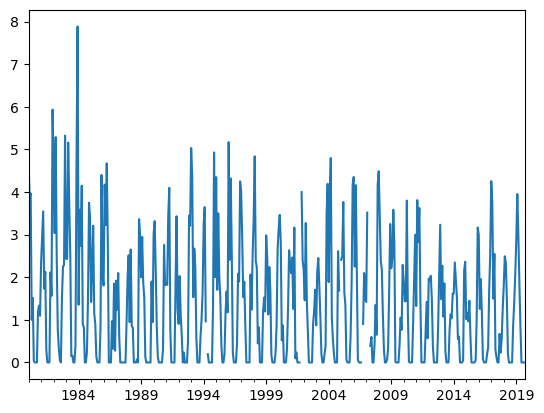

In [13]:
snow.resample('M').mean().plot.line()

<AxesSubplot:>

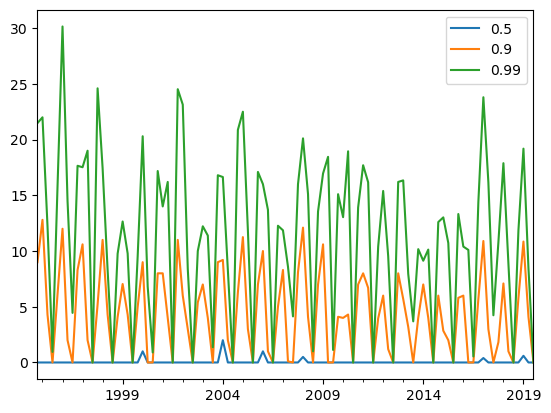

In [14]:
snow.resample('Q').quantile([.5,.9,.99]).unstack().iloc[-100:].plot.line()

# Bar Plot

In [15]:
season2017=snow.loc['2016-10':'2017-05']
season2017.resample('M').sum().div(season2017.sum()).mul(100).rename(lambda idx:idx.month_name())

October      2.153969
November     9.772637
December    15.715995
January     25.468688
February    21.041085
March        9.274033
April       14.738732
May          1.834862
Name: SNOW, dtype: float64

<AxesSubplot:title={'center':'2017 monthly percent of snowfall'}>

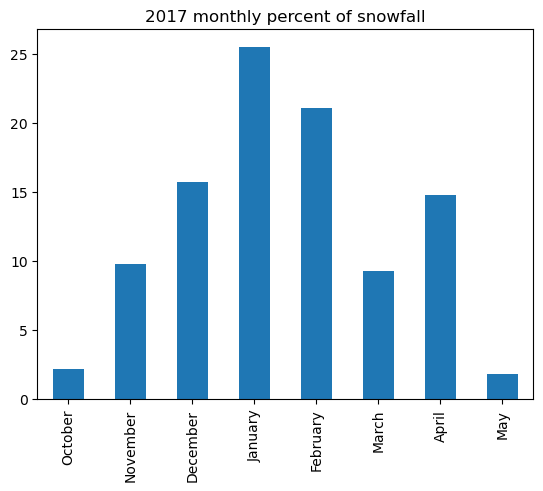

In [16]:
(season2017.resample('M').sum().div(season2017.sum()).mul(100).rename(lambda idx:idx.month_name())
.plot.bar(title='2017 monthly percent of snowfall'))

<AxesSubplot:title={'center':'2017 monthly percent of snowfall'}>

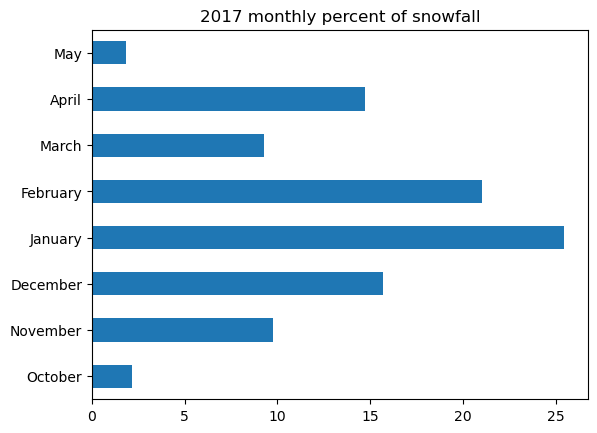

In [17]:
# horinzontal bar
(season2017.resample('M').sum().div(season2017.sum()).mul(100).rename(lambda idx:idx.month_name())
.plot.barh(title='2017 monthly percent of snowfall'))

In [18]:
newdf=pd.read_csv('data/vehicles.csv.zip')
make=newdf.make

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1228\1583356384.py:1: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  newdf=pd.read_csv('data/vehicles.csv.zip')


In [19]:
make.value_counts()

Chevrolet                      4003
Ford                           3371
Dodge                          2583
GMC                            2494
Toyota                         2071
                               ... 
Volga Associated Automobile       1
Panos                             1
Mahindra                          1
Excalibur Autos                   1
London Coach Co Inc               1
Name: make, Length: 136, dtype: int64

<AxesSubplot:>

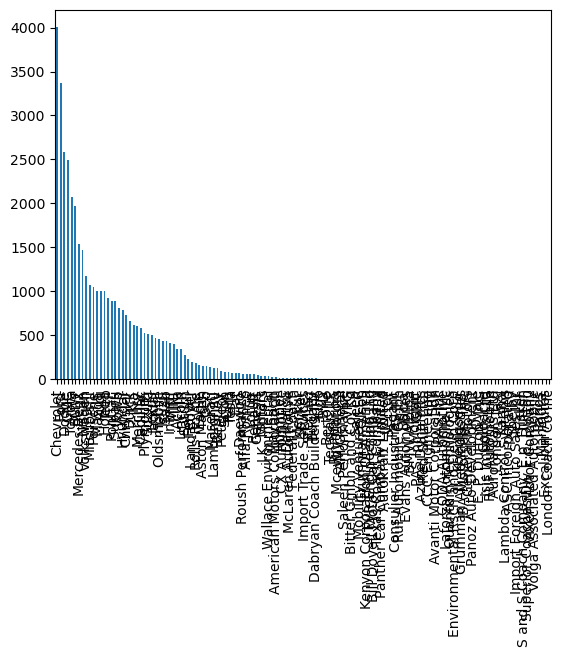

In [20]:
make.value_counts().plot.bar()

<AxesSubplot:>

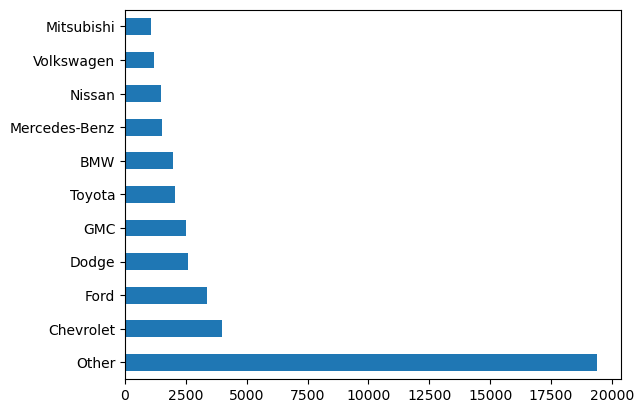

In [21]:
top10=make.value_counts().index[:10]
make.where(make.isin(top10),'Other').value_counts().plot.barh()

# Pie Chart

<AxesSubplot:title={'center':'2017 monthly percent of snowfall'}, ylabel='SNOW'>

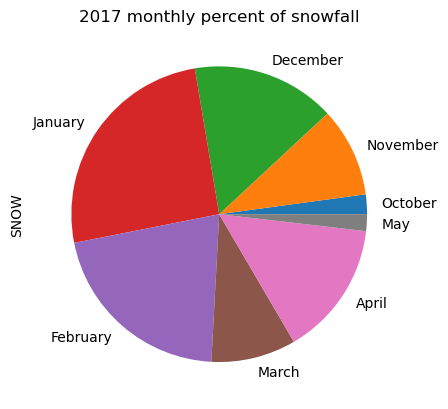

In [22]:
(season2017.resample('M').sum().div(season2017.sum()).mul(100).rename(lambda idx:idx.month_name())
.plot.pie(title='2017 monthly percent of snowfall'))

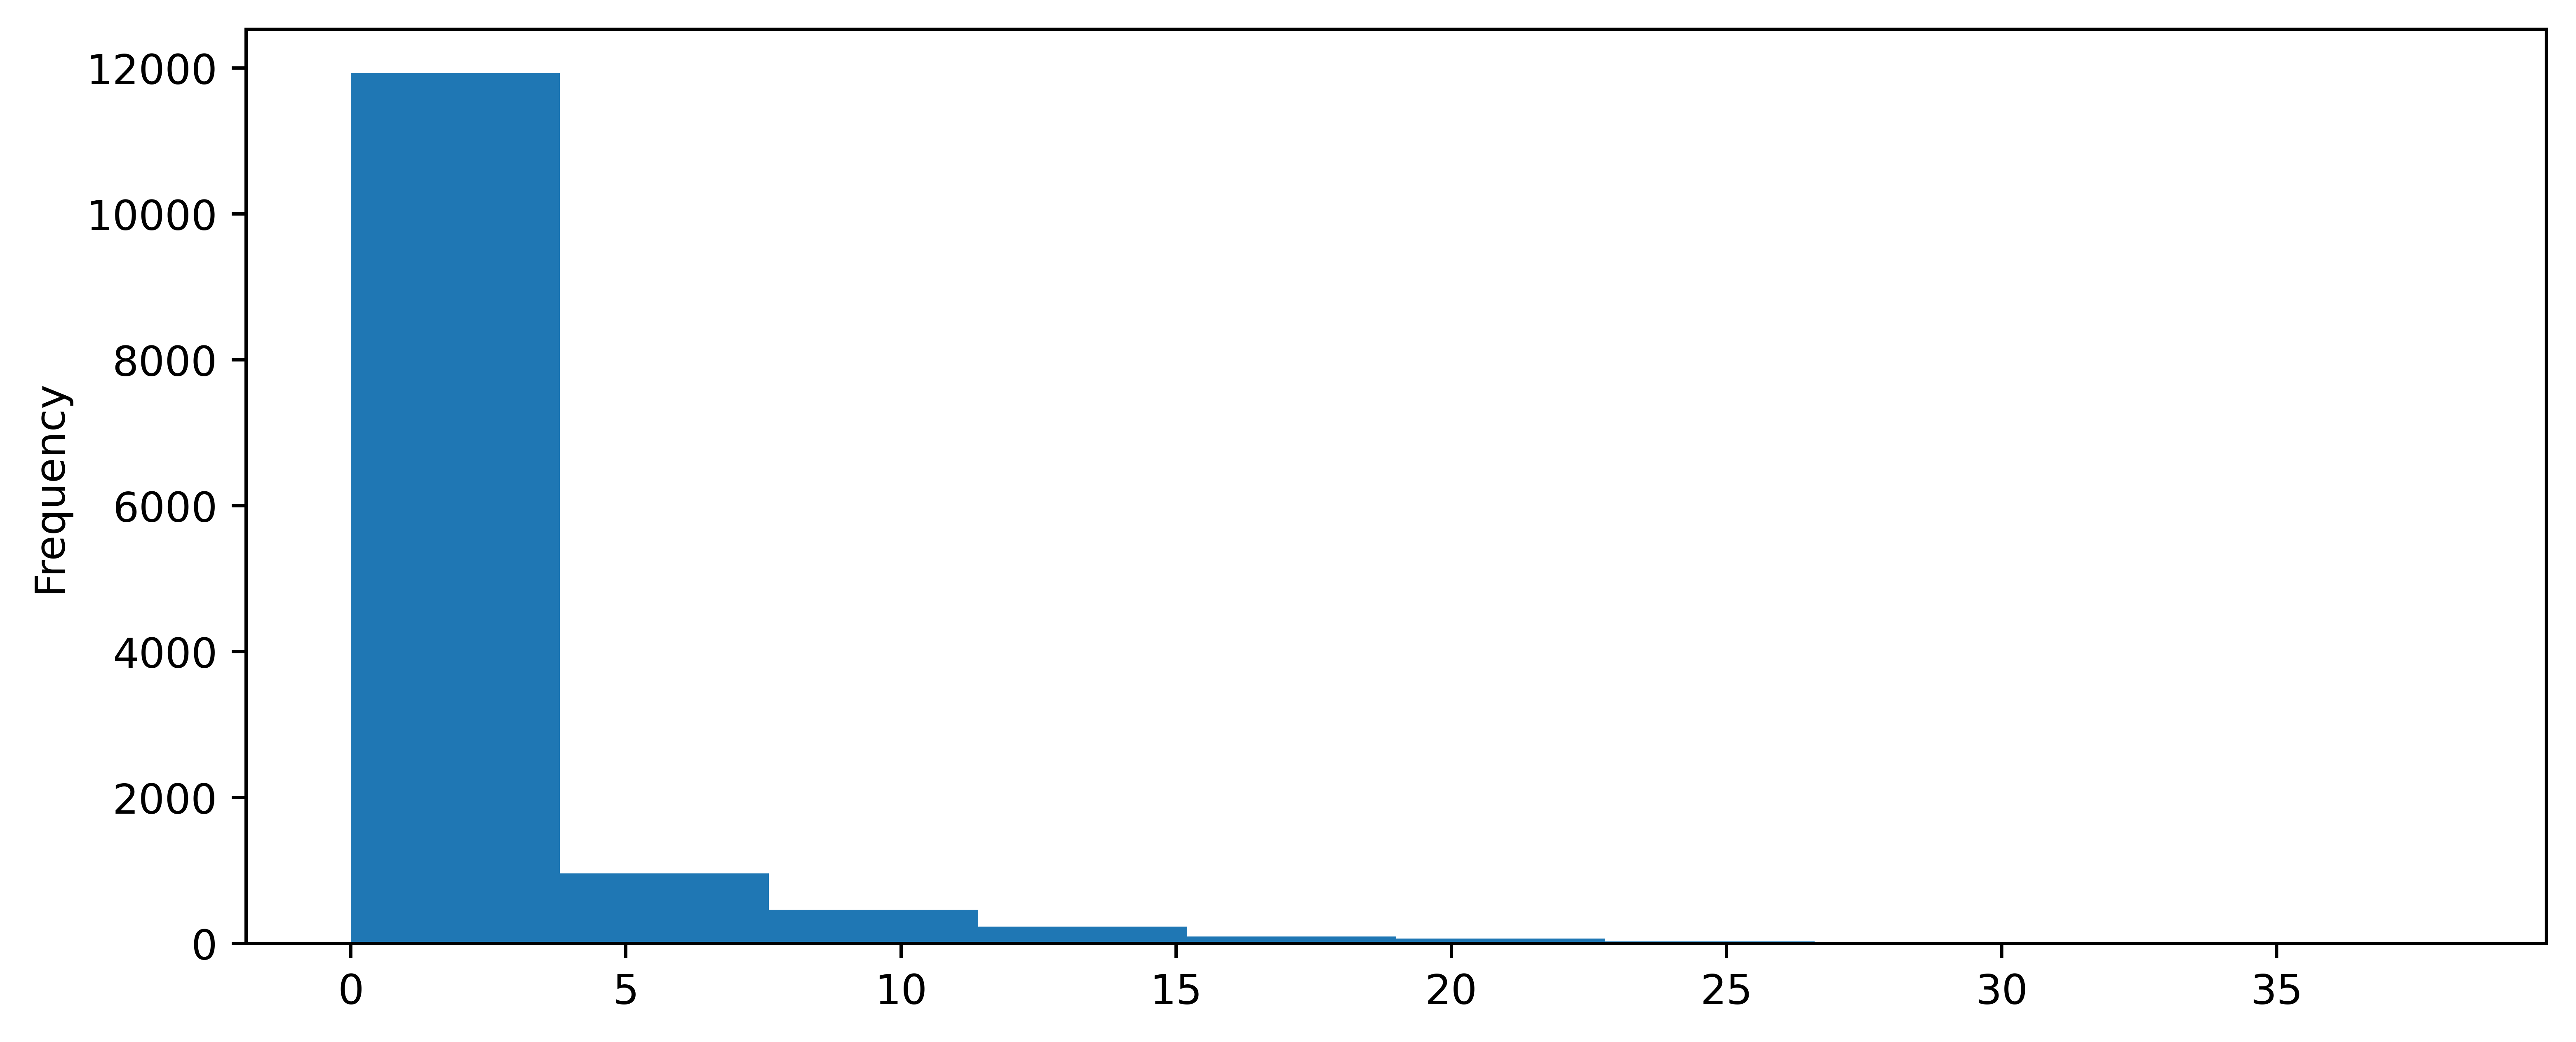

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

color_palette=['#440154','#482677','#404788',
               '#33638d','#287d8e','#1f968b','#29af7f','#55c667','#73d055','#b8de29','#fde725']
fp=matplotlib.font_manager.FontProperties(fname='/Fonts/roboto/Roboto-Condensed.ttf')
with sns.plotting_context(rc=dict(font='Roboto',palette=color_palette)):
    fig,ax=plt.subplots(dpi=720,figsize=(10,4))
    snow.plot.hist()
    fig.savefig('snowhist.png',dpi=720,bbox_inches='tight')